# Coastal_Dataset_Exploration.ipynb  
**:auth:** Nathan T. Stevens  
**:email:** ntsteven (at) uw.edu  
**:org:** Pacific Northwest Seismic Network  
**:license:** CC-BY-4.0  
**:purpose:**  
This notebook documents initial exploration of labeled event and P-wave characteristics for 
PNSN catalog earthquakes along Coastal Cascadia between 2015-01-01 and 2023-11-17. 

In [2]:
# IMPORT DEPENDENCIES
import os
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from obspy import UTCDateTime
from obspy.clients.fdsn import Client

In [6]:
# MAP DATAFILES
ROOT = os.path.join("..", "PNSN_metadata",'AQMS_Queries')
AQMS_EVENTS = os.path.join(ROOT, "Event_Mag", "AQMS_event_mag_query_output.csv")
AQMS_PWAVES = os.path.join(ROOT, "Event_Mag_Phase", "AQMS_event_mag_phase_query_output.csv")

In [7]:
# Explicitly (re)define the bounding box used for the PNSN catalog query
latll, lonll = 42.0, -125.5
latur, lonur = 49.0, -122.0
t0, t1 = UTCDateTime(2015,1,1), UTCDateTime(2023,11,17)

In [25]:
# Import CSV to DataFrame
df_event = pd.read_csv(AQMS_EVENTS)
# enforce bounds
df_event = df_event[
    (df_event.lat >= latll)
    & (df_event.lat <= latur)
    & (df_event.lon >= lonll)
    & (df_event.lon <= lonur)
]
display(df_event)
df_phase = pd.read_csv(AQMS_PWAVES)
df_phase = df_phase[
    (df_phase.lat >= latll)
    & (df_phase.lat <= latur)
    & (df_phase.lon >= lonll)
    & (df_phase.lon <= lonur)
]
display(df_phase)

,evid,orid,magid,magnitude,magtype,uncertainty,nsta,nobs,lat,lon,...,erlat,erlon,sdep,gap,quality,ndef,nbs,nbfm,fdepth,fepi
0,61038492,2168443,2478093,1.84,l,0.204000,15,31,47.360167,-122.471167,...,NaN,NaN,0.80,64,1.00,31,13,12,n,n
1,61039282,2168683,2478118,1.20,l,0.035000,6,8,48.432000,-122.764333,...,NaN,NaN,4.97,103,0.50,13,5,4,n,n
2,61589721,3121088,3045388,1.01,l,0.239602,6,10,45.921667,-122.802000,...,NaN,NaN,28.46,242,0.50,20,7,4,y,n
3,61037147,2176468,2477963,4.02,l,0.152000,16,46,44.089500,-122.831000,...,NaN,NaN,2.30,42,0.80,32,8,21,n,n
4,61037172,2689088,2589473,1.70,l,0.193000,9,16,47.245000,-123.649167,...,NaN,NaN,1.57,101,1.00,20,10,4,n,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7744,61502798,3242143,3233143,0.65,d,0.302201,3,3,46.091833,-122.873833,...,NaN,NaN,1.47,209,0.75,4,1,0,n,n
7745,61502808,3242123,3233123,0.84,d,0.133536,4,4,46.095667,-122.869333,...,NaN,NaN,8.38,188,0.50,5,0,0,y,n
7746,61962871,3242128,3233128,0.55,d,0.543419,5,5,46.093167,-122.876333,...,NaN,NaN,3.25,190,0.50,5,0,0,n,n
7747,61962866,3242148,3233148,0.64,d,0.196843,4,4,46.092667,-122.873333,...,NaN,NaN,31.61,209,0.50,4,0,0,y,y


,evid,magid,magnitude,magtype,uncertainty,nsta,nobs,orid,lat,lon,...,location,fm,qual,quality.1,snr,delta,seaz,in_wgt,timeres,rflag
0,61038492,2478093,1.84,l,0.204,15,31,2168443,47.360167,-122.471167,...,,d.,i,1.0,NaN,7.1,9.9,1.0,-0.35,H
1,61038492,2478093,1.84,l,0.204,15,31,2168443,47.360167,-122.471167,...,,d.,i,1.0,NaN,30.3,228.4,1.0,0.45,H
2,61038492,2478093,1.84,l,0.204,15,31,2168443,47.360167,-122.471167,...,,d.,i,1.0,NaN,31.6,311.4,1.0,-0.24,H
3,61038492,2478093,1.84,l,0.204,15,31,2168443,47.360167,-122.471167,...,,d.,i,1.0,NaN,38.4,157.1,1.0,-0.25,H
4,61038492,2478093,1.84,l,0.204,15,31,2168443,47.360167,-122.471167,...,,c.,i,1.0,NaN,41.3,176.9,1.0,-0.11,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112057,61384097,2837888,0.78,l,0.134,3,6,2934443,47.543667,-122.695667,...,,c.,i,1.0,NaN,6.9,273.8,1.0,-0.03,H
112058,61384097,2837888,0.78,l,0.134,3,6,2934443,47.543667,-122.695667,...,,c.,i,1.0,NaN,29.4,293.5,1.0,0.05,H
112059,61384097,2837888,0.78,l,0.134,3,6,2934443,47.543667,-122.695667,...,,..,i,0.8,NaN,10.0,283.2,1.0,-0.01,H
112060,61384097,2837888,0.78,l,0.134,3,6,2934443,47.543667,-122.695667,...,,..,i,0.8,NaN,28.3,313.1,1.0,-0.13,H


In [16]:
# Do an initial mapping of events using plotly.express
px.scatter_geo(df_event,lat='lat',lon='lon',color='magnitude')

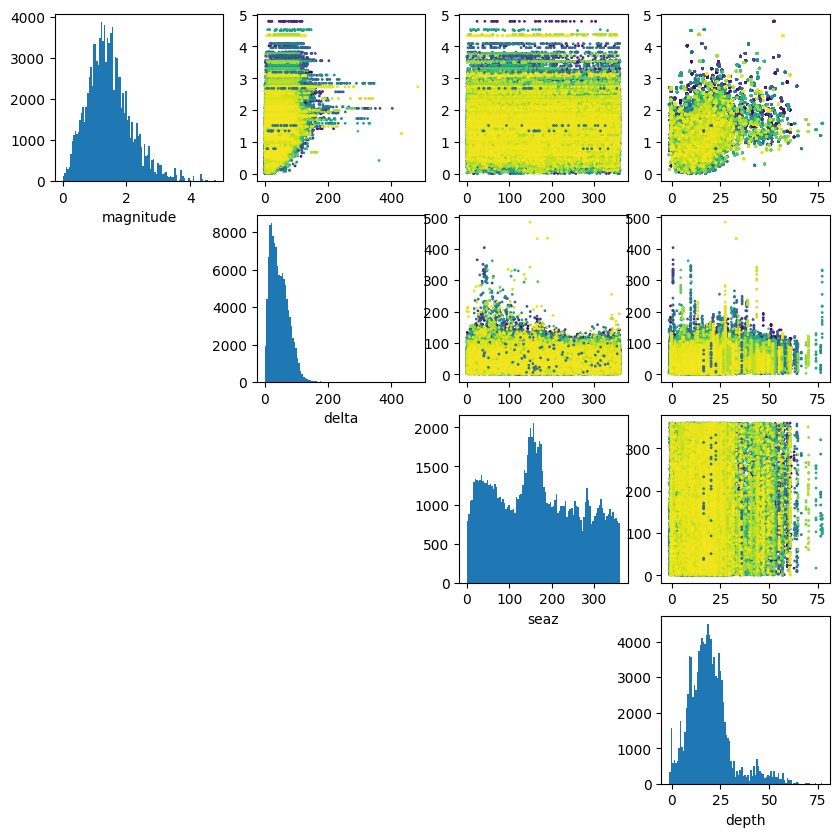

In [26]:
# Look at the distribution of source parameters that E3WS predicts
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(ncols=4, nrows=4)
fields = ['magnitude','delta','seaz','depth']
for _i, _ifld in enumerate(fields):
    for _j, _jfld in enumerate(fields):
        if _i <= _j:
            ax = fig.add_subplot(gs[_i,_j])
            if _i == _j:
                ax.hist(df_phase[_ifld].values, 100)
                ax.set_xlabel(_ifld)
            else:
                ax.scatter(df_phase[_jfld], df_phase[_ifld], c=df_phase['datetime'], s=1)
            

In [ ]:
# Look at relationships between magnitude source parameters (mag, seaz, delta, depth), signal quality (qual, quality, snr), and receiver type

# Also look at relative quality of source parameters and signal quality. 

# We want to be able to accurately predict on all these labeled data, but want to train on more-uniformly distributed subsets of the data (or at least he parent sample set)
